<a href="https://colab.research.google.com/github/a1ire3a/canny-edge-detector-from-scratch/blob/main/Canny_edge_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import urllib.request as url
from google.colab.patches import cv2_imshow

In [ ]:
def canny(img):
    size = img.shape
    img_shape_x = np.zeros(img.shape)
    img_shape_y = np.zeros(img.shape)

    #gaussian
    image = cv2.GaussianBlur(img, (3, 3), 0)

    #sobel mask
    a1 = [-1, 0, 1]
    a2 = [-2, 0, 2]
    a3 = [-1, 0, 1]
    X_sobel = np.array((a1, a2, a3))
    a1 = [-1, -2, -1]
    a2 = [0, 0, 0]
    a3 = [1, 2, 1]
    Y_sobel = np.array((a1, a2, a3))

    #gradient calc
    for i in range(1, size[0] - 1):
        for j in range(1, size[1] - 1):
            img_shape_x[i, j] = np.sum(np.multiply(image[i - 1: i + 2, j - 1: j + 2], X_sobel))
            img_shape_y[i, j] = np.sum(np.multiply(image[i - 1: i + 2, j - 1: j + 2], Y_sobel))

    angles = np.rad2deg(np.arctan2(img_shape_y, img_shape_x))

    convolved_image = np.sqrt(np.square(img_shape_x) + np.square(img_shape_y))
    convolved_image = np.multiply(convolved_image, 255.0 / convolved_image.max())
    convolved_image = convolved_image.astype('uint8')

    #Non-maximum suppression
    angles[angles < 0] += 180
    image_canny = np.zeros(size)
    for i in range(1, size[0] - 1):
        for j in range(1, size[1] - 1):
            if (0 <= angles[i, j] < 22.5) or (157.5 <= angles[i, j] <= 180):
                values = max(convolved_image[i, j - 1], convolved_image[i, j + 1])
            elif 22.5 <= angles[i, j] < 67.5:
                values = max(convolved_image[i - 1, j - 1], convolved_image[i + 1, j + 1])
            elif 67.5 <= angles[i, j] < 112.5:
                values = max(convolved_image[i - 1, j], convolved_image[i + 1, j])
            else:
                values = max(convolved_image[i + 1, j - 1], convolved_image[i - 1, j + 1])

            if convolved_image[i, j] >= values:
                image_canny[i, j] = convolved_image[i, j]
    maximum = image_canny.max()
    image_canny = np.multiply(image_canny, 255.0 / maximum)

    #double threshold
    #low is 50 and high is 255
    size_n = image_canny.shape
    final_img = np.zeros(size_n)
    n, m = np.where((image_canny > 0) & (image_canny <= 50))
    n1, y2 = np.where(image_canny >= 50)
    final_img[n1, y2] = 255
    final_img[n, m] = 50
    arr_x = np.array((-1, -1, 0, 1, 1, 1, 0, -1))
    arr_y = np.array((0, 1, 1, 1, 0, -1, -1, -1))

    #eadge tracking
    while len(n1):
        t1 = n1[0]
        t2 = y2[0]
        n1 = np.delete(n1, 0)
        y2 = np.delete(y2, 0)
        for i in range(len(arr_x)):
            if t1 + arr_x[i] >= 0 & t1 + arr_x[i] < size[0] & t2 + arr_y[i] >= 0 & t2 + arr_y[i] < size[1]:
                if final_img[t1 + arr_x[i], t2 + arr_y[i]] == 50:
                    np.append(n1, t1 + arr_x[i])
                    np.append(y2, t2 + arr_y[i])
                    final_img[t1 + arr_x[i], t2 + arr_y[i]] = 255

    final_img[final_img != 255] = 0
    return final_img

# **Sample 1**

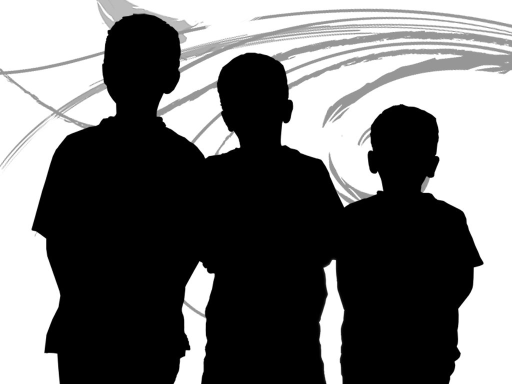

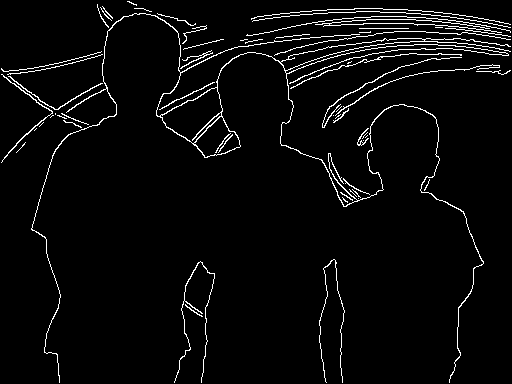

In [ ]:
req = url.urlopen("https://images.freeimages.com/images/large-previews/f6b/three-1150192.jpg")
imgArr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(imgArr, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (int(img.shape[1]/2),int(img.shape[0]/2)))
cv2_imshow(img)
res = canny(img)
cv2_imshow(res)

# **Sample 2**

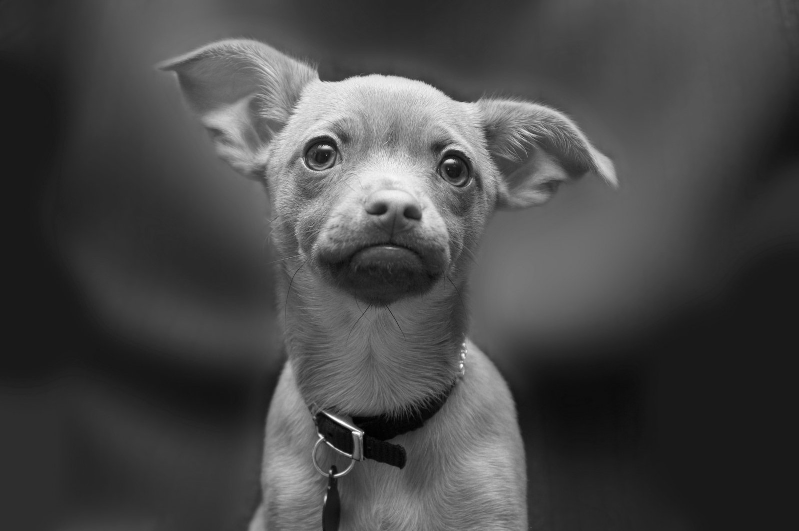

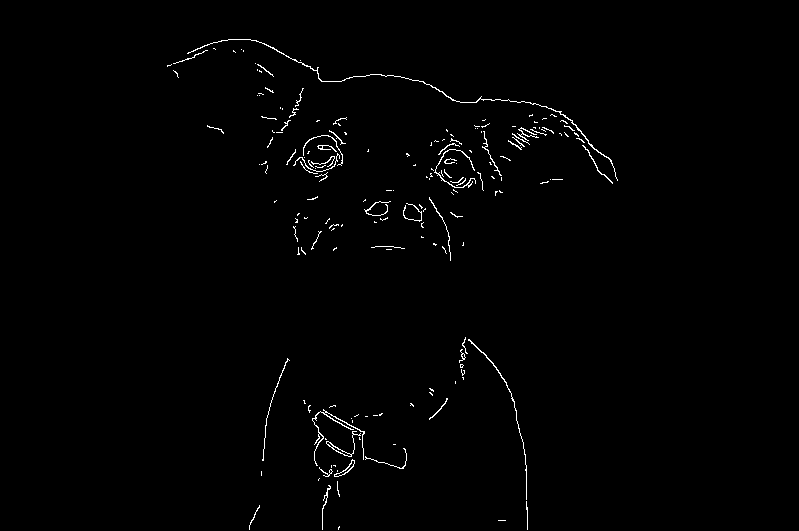

In [ ]:
req2 = url.urlopen("https://images.freeimages.com/images/large-previews/09d/puppy-black-and-white-1519453.jpg")
imgArr2 = np.asarray(bytearray(req2.read()), dtype=np.uint8)
img2 = cv2.imdecode(imgArr2, cv2.IMREAD_GRAYSCALE)
img2 = cv2.resize(img2, (int(img2.shape[1]/2),int(img2.shape[0]/2)))
cv2_imshow(img2)
res2 = canny(img2)
cv2_imshow(res2)

# **Sample 3**

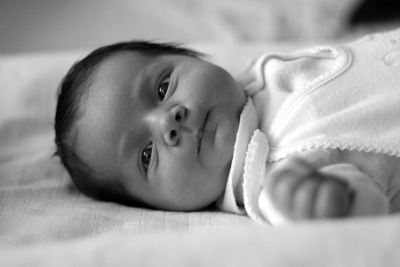

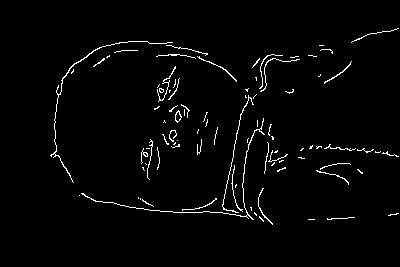

In [ ]:
req3 = url.urlopen("https://images.freeimages.com/images/large-previews/e36/baby-1432706.jpg")
imgArr3 = np.asarray(bytearray(req3.read()), dtype=np.uint8)
img3 = cv2.imdecode(imgArr3, cv2.IMREAD_GRAYSCALE)
img3 = cv2.resize(img3, (int(img3.shape[1]/2),int(img3.shape[0]/2)))
cv2_imshow(img3)
res3 = canny(img3)
cv2_imshow(res3)